<a href="https://colab.research.google.com/github/SandipPalit/ML-CODES/blob/main/Classification/ClassificationSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from tabulate import tabulate

import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Input Dataset

In [3]:
df = pd.read_csv('/content/AirlineSatisfaction.csv',low_memory=False)

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


### Preprocessing

In [5]:
df.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976,25976,25976.000000,25976,25976,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,13172,21177,NaN,18038,12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14573
mean,12987.500000,65005.657992,NaN,NaN,39.620958,NaN,NaN,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,NaN
std,7498.769632,37611.526647,NaN,NaN,15.135685,NaN,NaN,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,NaN
min,0.000000,17.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,6493.750000,32170.500000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,NaN
50%,12987.500000,65319.500000,NaN,NaN,40.000000,NaN,NaN,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,NaN
75%,19481.250000,97584.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,NaN


In [6]:
# removing Unnamed: 0 & idcolumns.
df=df.drop(['Unnamed: 0','id'],axis=1)

In [7]:
# removing Null
df=df.dropna()

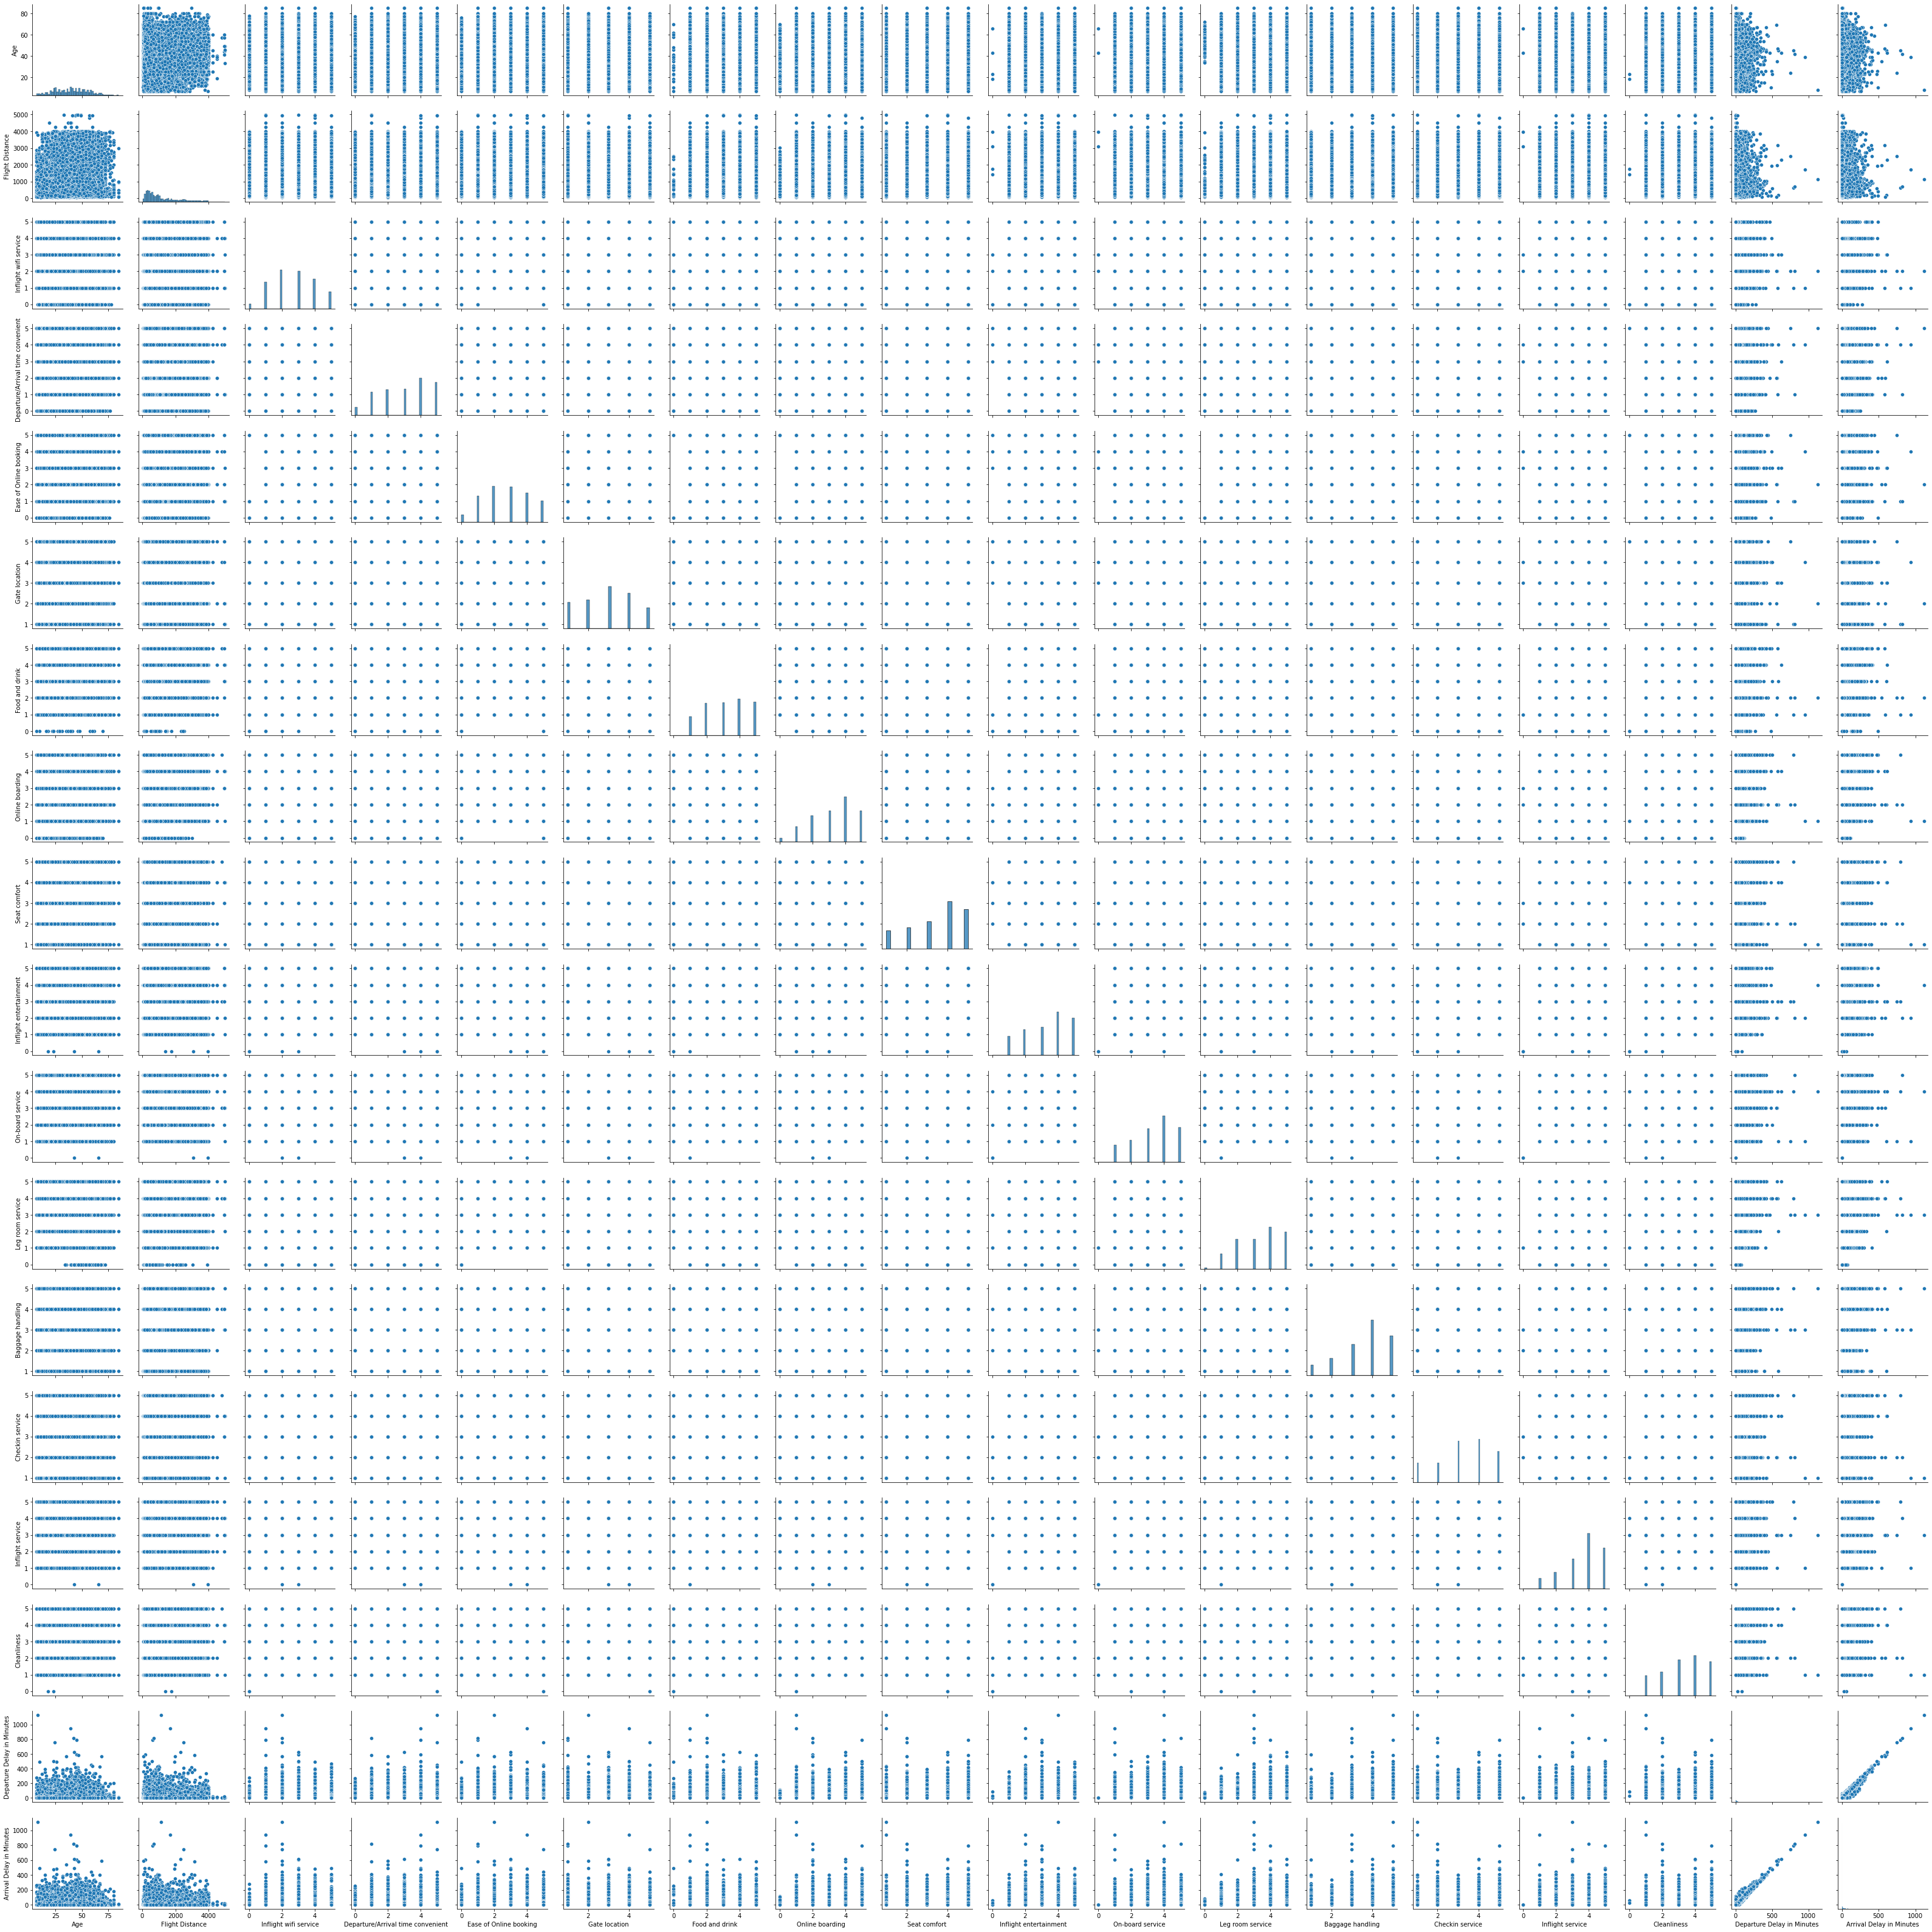

In [8]:
sns.pairplot(df)

In [9]:
# frequency of 'Summary' column
df['satisfaction'].value_counts()

neutral or dissatisfied    14528
satisfied                  11365
Name: satisfaction, dtype: int64

In [10]:
# Label Encoder
labelEncoder=LabelEncoder()
df['satisfaction']=labelEncoder.fit_transform(df[['satisfaction']])

print({l: i for i, l in enumerate(labelEncoder.classes_)})

{'neutral or dissatisfied': 0, 'satisfied': 1}


In [11]:
# One Hot Encoding
encoderG=OneHotEncoder(sparse=False)
dfG=pd.DataFrame(encoderG.fit_transform(df[['Gender']]))
dfG.columns = encoderG.get_feature_names_out(['Gender'])
dfG=dfG.drop(['Gender_Male'],axis=1)

encoderC=OneHotEncoder(sparse=False)
dfC=pd.DataFrame(encoderC.fit_transform(df[['Customer Type']]))
dfC.columns = encoderC.get_feature_names_out(['Customer Type'])
dfC=dfC.drop(['Customer Type_disloyal Customer'],axis=1)

encoderT=OneHotEncoder(sparse=False)
dfT=pd.DataFrame(encoderT.fit_transform(df[['Type of Travel']]))
dfT.columns = encoderT.get_feature_names_out(['Type of Travel'])
dfT=dfT.drop(['Type of Travel_Personal Travel'],axis=1)

encoderCl=OneHotEncoder(sparse=False)
dfCl=pd.DataFrame(encoderCl.fit_transform(df[['Class']]))
dfCl.columns = encoderCl.get_feature_names_out(['Class'])
dfCl=dfCl.drop(['Class_Eco Plus'],axis=1)

df=df.drop(['Gender','Customer Type','Type of Travel','Class'],axis=1)

df= pd.concat([dfG, dfC, dfT, dfCl, df ], axis=1)

In [12]:
# removing Null
df=df.dropna()

In [13]:
#Standardisation
standardScalerA=StandardScaler()
df['Age']=standardScalerA.fit_transform(df[['Age']])

standardScalerF=StandardScaler()
df['Flight Distance']=standardScalerF.fit_transform(df[['Flight Distance']])

standardScalerDD=StandardScaler()
df['Departure Delay in Minutes']=standardScalerDD.fit_transform(df[['Departure Delay in Minutes']])

standardScalerAD=StandardScaler()
df['Arrival Delay in Minutes']=standardScalerAD.fit_transform(df[['Arrival Delay in Minutes']])

In [14]:
df.head()

,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,1.0,1.0,0.0,1.0,0.817955,-1.034949,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,0.960664,0.778922,1.0
1,1.0,1.0,1.0,1.0,0.0,-0.239093,1.671961,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,-0.382594,-0.392986,1.0
2,0.0,0.0,1.0,0.0,1.0,-1.296141,-1.002903,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,-0.382594,-0.392986,0.0
3,0.0,1.0,1.0,1.0,0.0,0.289431,2.186705,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,-0.382594,-0.233180,1.0
4,1.0,1.0,1.0,0.0,1.0,0.619759,-0.011471,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,-0.382594,0.139699,1.0


### Model Training

In [15]:
Y=df[['satisfaction']]
X=df.drop(['satisfaction'],axis=1)

In [16]:
X.head()

,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,1.0,0.0,1.0,0.817955,-1.034949,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,0.960664,0.778922
1,1.0,1.0,1.0,1.0,0.0,-0.239093,1.671961,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,-0.382594,-0.392986
2,0.0,0.0,1.0,0.0,1.0,-1.296141,-1.002903,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,-0.382594,-0.392986
3,0.0,1.0,1.0,1.0,0.0,0.289431,2.186705,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,-0.382594,-0.233180
4,1.0,1.0,1.0,0.0,1.0,0.619759,-0.011471,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,-0.382594,0.139699


In [17]:
Y.head()

,satisfaction
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression

In [19]:
claLR=LogisticRegression()
claLR.fit(X_train,Y_train)
yPredClaLR=claLR.predict(X_test)
accuracy_score(yPredClaLR, Y_test)

0.8275862068965517

### K Nearest Neighbours Classification

In [20]:
claKNC=KNeighborsClassifier()
claKNC.fit(X_train,Y_train)
yPredClaKNC=claKNC.predict(X_test)
accuracy_score(yPredClaKNC, Y_test)

0.9097249128244866

### Support Vector Machine Classification

In [21]:
claSVC=SVC()
claSVC.fit(X_train,Y_train)
yPredClaSVC=claSVC.predict(X_test)
accuracy_score(yPredClaSVC, Y_test)

0.9128244866330879

### Decision Tree Classification

In [22]:
claDTC=DecisionTreeClassifier()
claDTC.fit(X_train,Y_train)
yPredClaDTC=claDTC.predict(X_test)
accuracy_score(yPredClaDTC, Y_test)

0.9012010848508331

### Random Forest Classification

In [23]:
claRFC=RandomForestClassifier()
claRFC.fit(X_train,Y_train)
yPredClaRFC=claRFC.predict(X_test)
accuracy_score(yPredClaRFC, Y_test)

0.9389771406431615

### Model Evaluation

In [24]:
data=[
     ["Logistic Regression",round(accuracy_score(yPredClaLR, Y_test),3),round(f1_score(yPredClaLR, Y_test),3),round(roc_auc_score(yPredClaLR, Y_test),3)],
     ["K Nearest Neighbours Classification",round(accuracy_score(yPredClaKNC, Y_test),3),round(f1_score(yPredClaKNC, Y_test),3),round(roc_auc_score(yPredClaKNC, Y_test),3)],
     ["Support Vector Machine Classification",round(accuracy_score(yPredClaSVC, Y_test),3),round(f1_score(yPredClaSVC, Y_test),3),round(roc_auc_score(yPredClaSVC, Y_test),3)],
     ["Decision Tree Classification",round(accuracy_score(yPredClaDTC, Y_test),3),round(f1_score(yPredClaDTC, Y_test),3),round(roc_auc_score(yPredClaDTC, Y_test),3)],
     ["Random Forest Classification",round(accuracy_score(yPredClaRFC, Y_test),3),round(f1_score(yPredClaRFC, Y_test),3),round(roc_auc_score(yPredClaRFC, Y_test),3)] 
    ]
columns=["Model Name","Accuracy","F1 Score","ROC AUC Score"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════════════════╤════════════╤════════════╤═════════════════╕
│ Model Name                            │   Accuracy │   F1 Score │   ROC AUC Score │
╞═══════════════════════════════════════╪════════════╪════════════╪═════════════════╡
│ Logistic Regression                   │      0.828 │      0.795 │           0.825 │
├───────────────────────────────────────┼────────────┼────────────┼─────────────────┤
│ K Nearest Neighbours Classification   │      0.91  │      0.892 │           0.91  │
├───────────────────────────────────────┼────────────┼────────────┼─────────────────┤
│ Support Vector Machine Classification │      0.913 │      0.897 │           0.912 │
├───────────────────────────────────────┼────────────┼────────────┼─────────────────┤
│ Decision Tree Classification          │      0.901 │      0.885 │           0.899 │
├───────────────────────────────────────┼────────────┼────────────┼─────────────────┤
│ Random Forest Classification          │      0.939 │

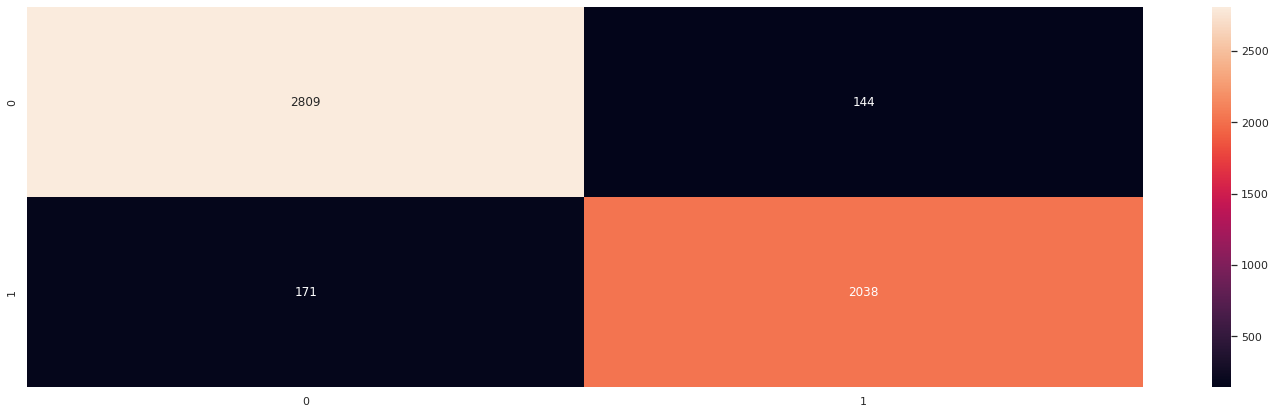

In [25]:
# Random Forest Classification
sns.set(rc={'figure.figsize':(25,7)})
sns.heatmap(confusion_matrix(Y_test, yPredClaRFC),annot=True, fmt='g')